<a href="https://colab.research.google.com/github/Shivieo/EDA_Optimal/blob/EDA_optimal/EDA_re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA-1**
**Title - Bike details dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('BIKE DETAILS.csv')
df

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1056  1st owner     500000            52000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[1061 rows x 7 columns]

The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for
used bikes.

Source:

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.


Description:

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.


The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.

 =name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")Z
 selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)Z
 year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)Z
 seller_type: Seller category, either "Individual" or "Dealer" (Categorical)Z
 owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)Z
 km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)Z
 ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [ ]:
df.shape

(1061, 7)

In [ ]:
df.describe()

selling_price         year      km_driven  ex_showroom_price
count    1061.000000  1061.000000    1061.000000       6.260000e+02
mean    59638.151744  2013.867107   34359.833176       8.795871e+04
std     56304.291973     4.301191   51623.152702       7.749659e+04
min      5000.000000  1988.000000     350.000000       3.049000e+04
25%     28000.000000  2011.000000   13500.000000       5.485200e+04
50%     45000.000000  2015.000000   25000.000000       7.275250e+04
75%     70000.000000  2017.000000   43000.000000       8.703150e+04
max    760000.000000  2020.000000  880000.000000       1.278000e+06

In [ ]:
df.describe(include = 'object')

name seller_type      owner
count               1061        1061       1061
unique               279           2          4
top     Bajaj Pulsar 150  Individual  1st owner
freq                  41        1055        924

In [ ]:
df.isna().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

**Questions related to the** **dataset**

In [ ]:
#1. What is the range of selling prices in the dataset?

In [ ]:
range_df = df['selling_price'].max() - df['selling_price'].min()
range_df

755000

In [ ]:
#2. What is the median selling price for bikes in the dataset?

In [ ]:
df['selling_price'].median()

45000.0

In [ ]:
#3. What is the most common seller type?

In [ ]:
df['seller_type'].mode()

0    Individual
Name: seller_type, dtype: object

In [ ]:
df['seller_type'].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [ ]:
#4. How many bikes have driven more than 50,000 kilometers?

In [ ]:
df[df['km_driven']>50000][['name', 'km_driven']]

name  km_driven
5                  Honda CB Twister      60000
15    Suzuki Access 125 [2007-2016]      55000
20             Hero Passion Pro 110      60000
31          Yamaha FZ S [2012-2016]      75000
43                Hero Passion XPro      81000
...                             ...        ...
1049            Hero Super Splendor      55000
1050               Bajaj Pulsar 150      60000
1056                      Activa 3g     500000
1059                 Honda CB Shine      53000
1060               Bajaj Pulsar 150      92233

[170 rows x 2 columns]

In [ ]:
#5. What is the average km_driven value for each ownership type?

In [ ]:
df.groupby('owner')['km_driven'].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [ ]:
#6. What proportion of bikes are from the year 2015 or older?

In [ ]:
df[df['year']<=2015][['name','year']]

name  year
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015
4                    Yamaha SZ [2013-2014]  2011
5                         Honda CB Twister  2010
7     Royal Enfield Bullet 350 [2007-2011]  2008
8                   Hero Honda CBZ extreme  2010
...                                    ...   ...
1056                             Activa 3g  2010
1057                      Honda CB twister  2012
1058                    Bajaj Discover 125  2013
1059                        Honda CB Shine  2009
1060                      Bajaj Pulsar 150  2008

[601 rows x 2 columns]

In [ ]:
#7. What is the trend of missing values across the dataset?

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)
print("Percentage of Missing Values per Column:\n", missing_percentage)

Percentage of Missing Values per Column:
 ex_showroom_price    40.999057
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
dtype: float64


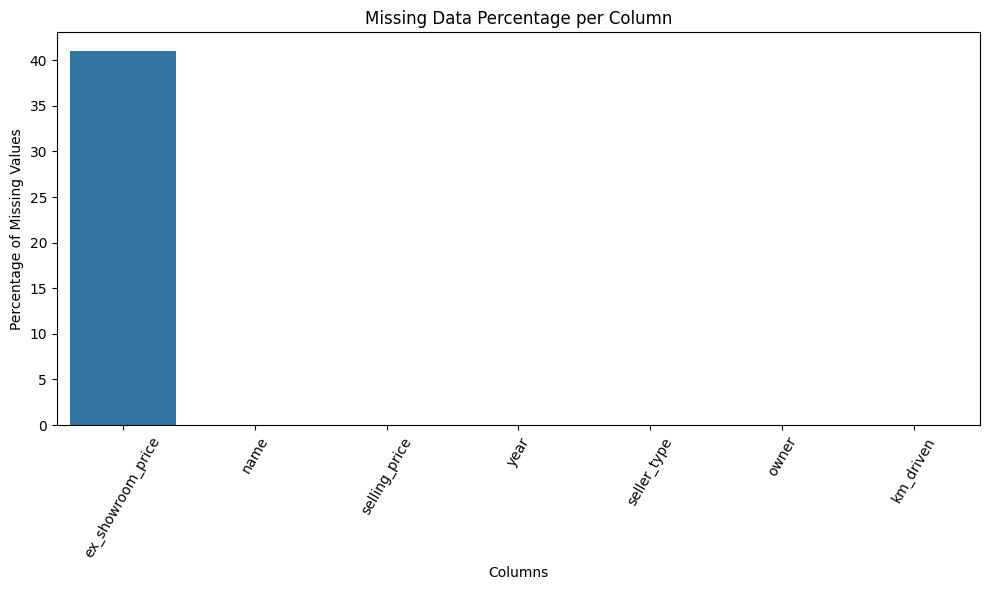

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=60)
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Data Percentage per Column")
plt.tight_layout()
plt.show()

In [ ]:
#8. What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
df[df['ex_showroom_price'] == df['ex_showroom_price'].max()][['name','ex_showroom_price']]

name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0

In [ ]:
#9. What is the total number of bikes listed by each seller type?

In [ ]:
df.head()

name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN

In [ ]:
df.groupby('seller_type')['name'].count()

seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64

In [ ]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?

In [ ]:
rln = df[df['owner'] == '1st owner']
'''
Statistical approach
'''
print("Descriptive Statistics for First Owner Bikes:")
print(rln[['selling_price', 'km_driven']].describe())

Descriptive Statistics for First Owner Bikes:
       selling_price      km_driven
count     924.000000     924.000000
mean    60022.813853   32816.583333
std     51542.569711   45870.365226
min      5000.000000     350.000000
25%     30000.000000   12000.000000
50%     45000.000000   24000.000000
75%     74250.000000   41000.000000
max    760000.000000  646000.000000


In [ ]:
'''
correlation approach
'''
correlation = rln['selling_price'].corr(rln['km_driven'])
print(f"Correlation Coefficient: {correlation}")

Correlation Coefficient: -0.2434817484496572


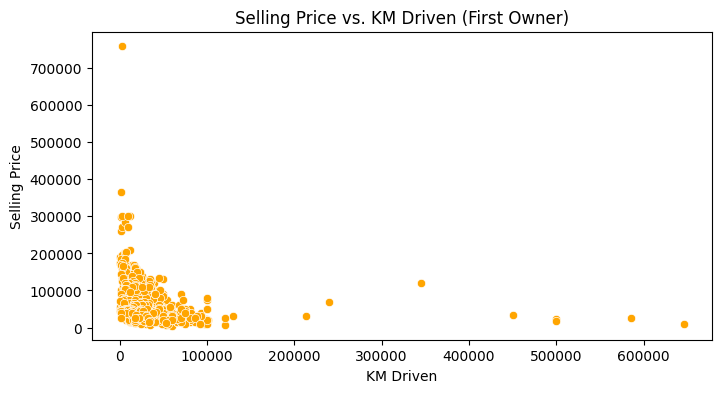

In [ ]:
'''
graphical approach
'''
plt.figure(figsize=(8, 4))
sns.scatterplot(x='km_driven', y='selling_price', data=rln, color = 'orange')
plt.title('Selling Price vs. KM Driven (First Owner)')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
#Insights -
# More number of bikes are sold at prices upto 3 lakhs
# As the milage increases more than 1 lakh, less people buys it means less density when km increases
# few outliers are present at km driven and selling price

In [ ]:
#11. Identify and remove outliers in the km_driven column using the IQR method.

<Axes: ylabel='km_driven'>

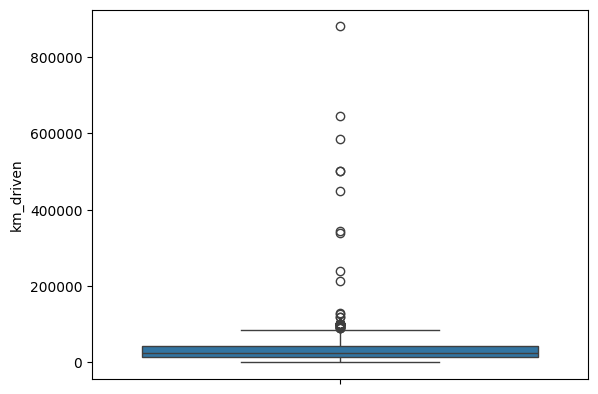

In [ ]:
sns.boxplot(df['km_driven'])

In [ ]:
Q1= df['km_driven'].quantile(.25)
Q3 = df['km_driven'].quantile(.75)
IQR = Q3 - Q1
LF = Q1 - (1.5*IQR)
UF = Q3 + (1.5*IQR)
no_outliers = df[(df['km_driven']>=LF) & (df['km_driven']<=UF)]

<Axes: ylabel='km_driven'>

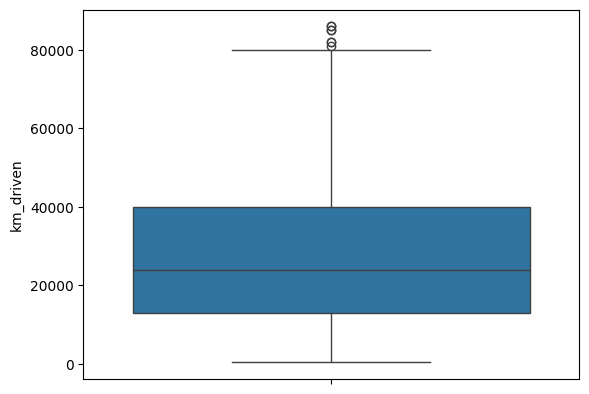

In [ ]:
sns.boxplot(no_outliers['km_driven'])

In [ ]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

In [ ]:
df['year'].dtype

dtype('int64')

In [ ]:
df['selling_price']

0       175000
1        45000
2       150000
3        65000
4        20000
         ...  
1056     17000
1057     16000
1058     15000
1059     12000
1060     10000
Name: selling_price, Length: 1061, dtype: int64

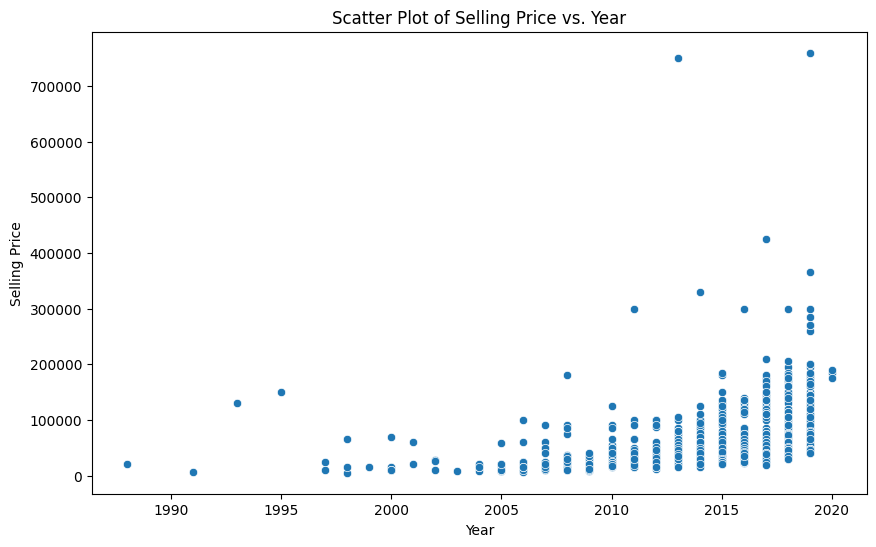

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Scatter Plot of Selling Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()


In [ ]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

In [ ]:
current_year = pd.Timestamp.now().year
df['bike_age'] = current_year - df['year']
average_prices_by_age = df.groupby('bike_age')['selling_price'].mean().reset_index()
depreciation = average_prices_by_age.copy()
depreciation['depreciation'] = depreciation['selling_price'].diff() * -1
depreciation

bike_age  selling_price   depreciation
0          4  183333.333333            NaN
1          5  119689.511628   63643.821705
2          6   87660.374046   32029.137582
3          7   78894.736842    8765.637204
4          8   58469.018692   20425.718151
5          9   56500.000000    1969.018692
6         10   48668.131868    7831.868132
7         11   51136.986301   -2468.854433
8         12   35748.400000   15388.586301
9         13   35655.721311      92.678689
10        14   31793.333333    3862.387978
11        15   22267.857143    9525.476190
12        16   34289.285714  -12021.428571
13        17   24927.586207    9361.699507
14        18   23380.000000    1547.586207
15        19   16978.571429    6401.428571
16        20   15100.000000    1878.571429
17        21    8000.000000    7100.000000
18        22   20666.666667  -12666.666667
19        23   40000.000000  -19333.333333
20        24   20833.333333   19166.666667
21        25   15000.000000    5833.333333
22        26   28333.333333  -13333.333333
23        27   17500.000000   10833.333333
24        29  150000.000000 -132500.000000
25        31  130000.000000   20000.000000
26        33    6000.000000  124000.000000
27        36   20000.000000  -14000.000000

In [ ]:
overall_average_depreciation = depreciation['depreciation'].mean()
print(f"\nOverall Average Depreciation: {overall_average_depreciation}")


Overall Average Depreciation: 6049.382716049383


In [ ]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
average_prices_by_year = df.groupby('year')['selling_price'].transform('mean')
df['average_price_for_year'] = average_prices_by_year
df[df['selling_price'] > df['average_price_for_year']][['name', 'selling_price']]

name  selling_price
0                Royal Enfield Classic 350         175000
2      Royal Enfield Classic Gunmetal Grey         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]          65000
7     Royal Enfield Bullet 350 [2007-2011]         180000
13                           Yamaha YZF R3         365000
...                                    ...            ...
1004                  Bajaj Pulsar  NS 200          60000
1005                    TVS Apache RTR 160          60000
1008                    Bajaj Pulsar 220 F          52000
1012                   Bajaj Pulsar NS 200          50000
1023                Bajaj Avenger 220 dtsi          45000

[334 rows x 2 columns]

In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

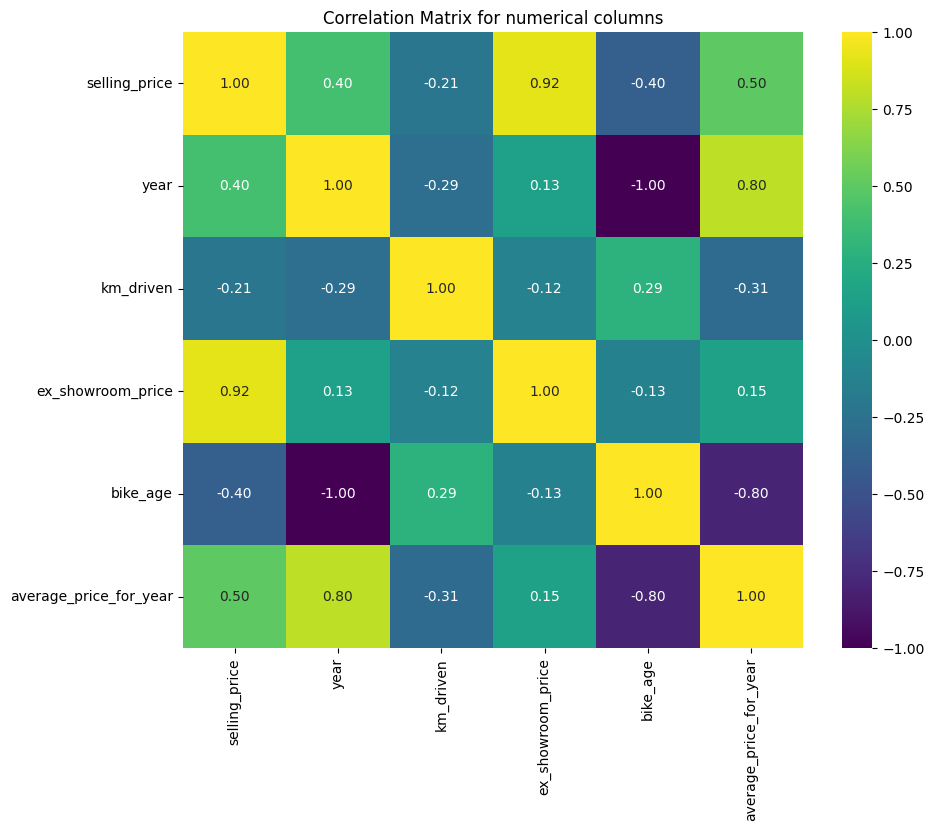

In [ ]:
numeric_columns = df.select_dtypes(include = ['number']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap = 'viridis', annot = True, fmt = ".2f")
plt.title('Correlation Matrix for numerical columns')
plt.show()

**EDA-2**
**Title: Car sale Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df2 = pd.read_csv('Car Sale.csv')
df2

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[23906 rows x 16 columns]

**The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and
consumer behavior.**

**Description:**

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences.

**Features**

 Car_id: A unique identifier for each car in the dataset, helping to track individual car entries
 Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD
 Customer Name: The name of the customer who purchased the car, represented as a string
 Gender: The gender of the customer, categorized as "Male" or "Female.
 Annual Income: The customer's annual income in US dollars, represented as a numeric value
 Dealer_Name: The name of the dealership selling the car, represented as a string
 Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc
 Model: The specific model name of the car, such as "Corolla," "Civic," etc
 Engine: The engine type of the car, such as "V6," "I4," etc
 Transmission: The type of transmission in the car, either "Manual" or "Automatic.
 Color: The color of the car, represented as a string (e.g., "Red," "Blue")
 Price ($): The selling price of the car in US dollars
 Dealer_No: A unique identifier for each car dealer in the dataset
 Body Style: The body style of the car, such as "Sedan," "SUV," etc
 Phone: The phone number of the customer who purchased the car
 Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.

In [ ]:
df2.head()

Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000  60504-7114   
2          Overhead Camshaft       Manual         Red      31500  38701-8047   
3          Overhead Camshaft       Manual  Pale White      14000  99301-3882   
4  DoubleÂ Overhead Camshaft         Auto         Red      24500  53546-9427   

  Body Style    Phone Dealer_Region  
0        SUV  8264678    Middletown  
1        SUV  6848189        Aurora  
2  Passenger  7298798    Greenville  
3        SUV  6257557         Pasco  
4  Hatchback  7081483    Janesville

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
df2.shape

(23906, 16)

In [ ]:
df2.describe()

Annual Income     Price ($)         Phone
count   2.390600e+04  23906.000000  2.390600e+04
mean    8.308403e+05  28090.247846  7.497741e+06
std     7.200064e+05  14788.687608  8.674920e+05
min     1.008000e+04   1200.000000  6.000101e+06
25%     3.860000e+05  18001.000000  6.746495e+06
50%     7.350000e+05  23000.000000  7.496198e+06
75%     1.175750e+06  34000.000000  8.248146e+06
max     1.120000e+07  85800.000000  8.999579e+06

In [ ]:
df2.describe(include = object)

Car_id      Date Customer Name Gender  \
count          23906     23906         23905  23906   
unique         23906       612          3021      2   
top     C_CND_000001  9/5/2023        Thomas   Male   
freq               1       190            92  18798   

                                            Dealer_Name    Company     Model  \
count                                             23906      23906     23906   
unique                                               28         30       154   
top     Progressive Shippers Cooperative Association No  Chevrolet  Diamante   
freq                                               1318       1819       418   

                           Engine Transmission       Color  Dealer_No   \
count                       23906        23906       23906       23906   
unique                          2            2           3           7   
top     DoubleÂ Overhead Camshaft         Auto  Pale White  85257-3102   
freq                        12571        12571       11256        3814   

       Body Style Dealer_Region  
count       23906         23906  
unique          5             7  
top           SUV        Austin  
freq         6374          4135

In [ ]:
df2.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [ ]:
df2.isna().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

**Questions**

In [ ]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

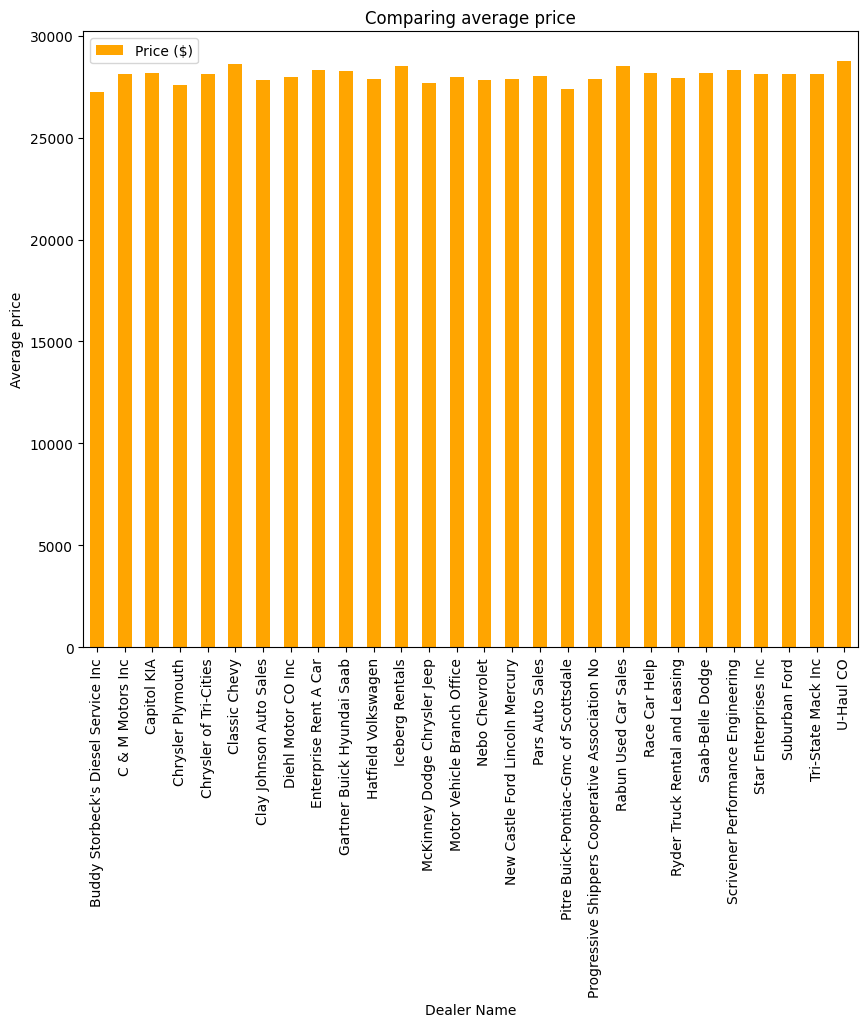

In [ ]:
Avg_price = df2.groupby('Dealer_Name')['Price ($)'].mean()
print(Avg_price)
#comparing using bar plot
plt.figure(figsize=(10,8))
Avg_price.plot(kind = 'bar', color = 'orange')
plt.title("Comparing average price")
plt.xlabel('Dealer Name')
plt.ylabel('Average price')
plt.legend()
plt.show()

In [ ]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [ ]:
company_std = df2.groupby('Company')['Price ($)'].std(ddof=1)
highest_std_company = company_std.idxmax()
highest_std_value = company_std.max()
df2[df2['Company']==highest_std_company]

Car_id        Date Customer Name  Gender  Annual Income  \
76     C_CND_000077    1/5/2022        Hunter    Male        1200000   
170    C_CND_000171   1/13/2022        Jordan    Male          13500   
228    C_CND_000229   1/21/2022        Chanel  Female         920000   
277    C_CND_000278   1/27/2022         Allen    Male        2000000   
315    C_CND_000316    2/3/2022         Karen    Male        1030000   
...             ...         ...           ...     ...            ...   
23780  C_CND_023781  12/29/2023      Thibault    Male         940000   
23809  C_CND_023810  12/29/2023         Louen    Male        2065000   
23814  C_CND_023815  12/29/2023        Eileen    Male         609000   
23869  C_CND_023870  12/30/2023        Benoit    Male          13500   
23892  C_CND_023893  12/31/2023      Shoshana    Male          13500   

                             Dealer_Name  Company        Model  \
76                Chrysler of Tri-Cities  Lincoln     Town car   
170    Scrivener Performance Engineering  Lincoln  Continental   
228           Gartner Buick Hyundai Saab  Lincoln    Navigator   
277                Enterprise Rent A Car  Lincoln  Continental   
315                        Suburban Ford  Lincoln    Navigator   
...                                  ...      ...          ...   
23780              Enterprise Rent A Car  Lincoln     Town car   
23809                          U-Haul CO  Lincoln  Continental   
23814                  Chrysler Plymouth  Lincoln  Continental   
23869                      Suburban Ford  Lincoln    Navigator   
23892                      Suburban Ford  Lincoln  Continental   

                          Engine Transmission       Color  Price ($)  \
76             Overhead Camshaft       Manual       Black      17000   
170            Overhead Camshaft       Manual  Pale White      82000   
228    DoubleÂ Overhead Camshaft         Auto       Black      19000   
277            Overhead Camshaft       Manual       Black      42000   
315            Overhead Camshaft       Manual  Pale White      33000   
...                          ...          ...         ...        ...   
23780          Overhead Camshaft       Manual  Pale White      33000   
23809          Overhead Camshaft       Manual         Red      82500   
23814          Overhead Camshaft       Manual       Black      42000   
23869  DoubleÂ Overhead Camshaft         Auto       Black      19000   
23892          Overhead Camshaft       Manual       Black      18000   

       Dealer_No  Body Style    Phone Dealer_Region  
76     99301-3882  Hatchback  7072635         Pasco  
170    38701-8047  Passenger  6642461    Greenville  
228    38701-8047      Sedan  6548543    Greenville  
277    60504-7114  Passenger  7712199    Scottsdale  
315    53546-9427      Sedan  6038590    Janesville  
...           ...        ...      ...           ...  
23780  60504-7114  Hatchback  6500105    Middletown  
23809  78758-7841  Passenger  6406323        Aurora  
23814  53546-9427  Passenger  8029869        Austin  
23869  53546-9427      Sedan  8081121        Austin  
23892  53546-9427  Passenger  8137509    Janesville  

[492 rows x 16 columns]

In [ ]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

In [ ]:
def calculate_iqr(series):
    return series.quantile(0.75) - series.quantile(0.25)
df2.groupby('Transmission')['Price ($)'].agg(calculate_iqr).reset_index()

Transmission  Price ($)
0         Auto    16500.0
1       Manual    17000.0

In [ ]:
#4. What is the distribution of car prices across different regions?

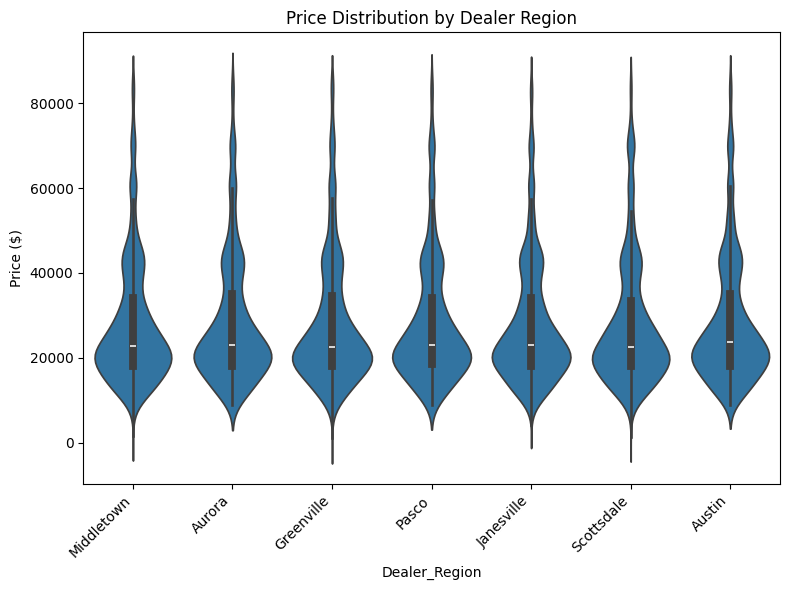

In [ ]:
plt.figure(figsize = (8, 6))
sns.violinplot(x = 'Dealer_Region', y = 'Price ($)', data = df2)
plt.title("Price Distribution by Dealer Region")
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#5. What is the distribution of cars based on body styles?

Body Style  Hardtop  Hatchback  Passenger  SUV  Sedan
Company                                              
Acura             0        269         48  372      0
Audi             70         13         37  348      0
BMW               0        260          0  324    206
Buick            20        212        152   14     41
Cadillac         45        102        232  110    163
Chevrolet       406        318        420  565    110
Chrysler        144        362         37  314    263
Dodge           333        345        216  633    144
Ford            170        434        336  440    234
Honda            79        135         67  184    243
Hyundai           0         35          0  164     65
Infiniti        134         20          0   41      0
Jaguar            0          0        180    0      0
Jeep              0        164          0  125     74
Lexus            62        177         63  146    354
Lincoln           0        161        206    0    125
Mercedes-B      183        3

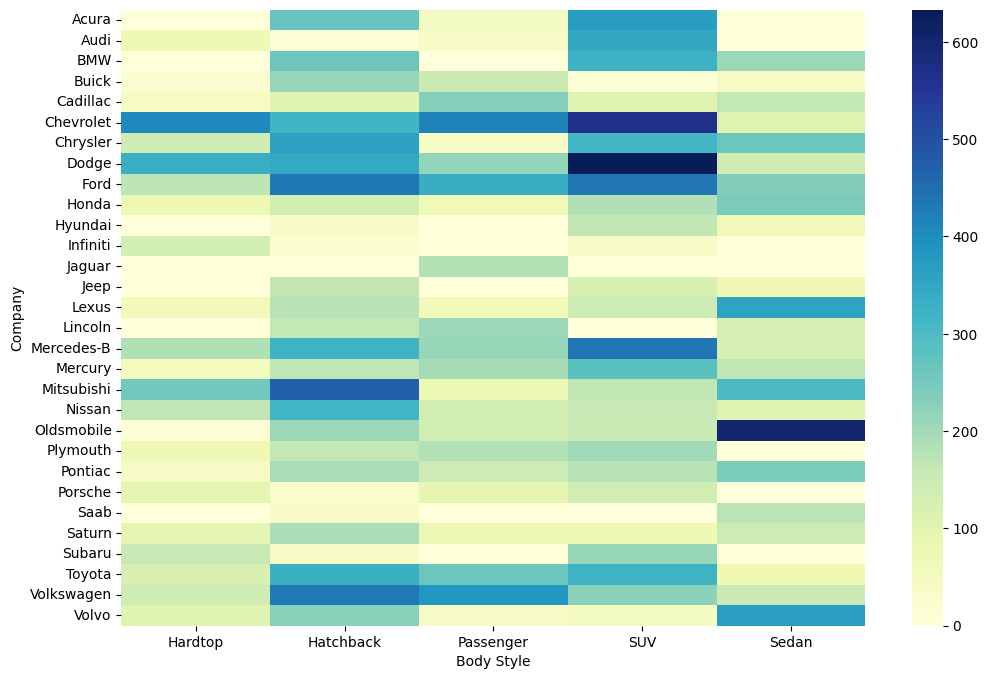

In [ ]:
cross_tab = pd.crosstab(df2['Company'], df2['Body Style'])
print(cross_tab)

plt.figure(figsize=(12,8))
sns.heatmap(cross_tab, cmap="YlGnBu")
plt.show()

In [ ]:
#6. How does the average selling price of cars vary by customer gender and annual income?

In [ ]:
df2.groupby('Annual Income')['Price ($)'].mean()

Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64

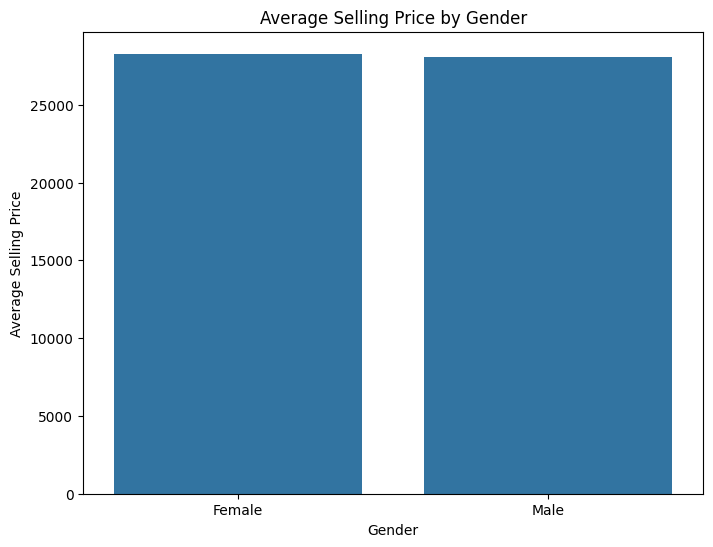

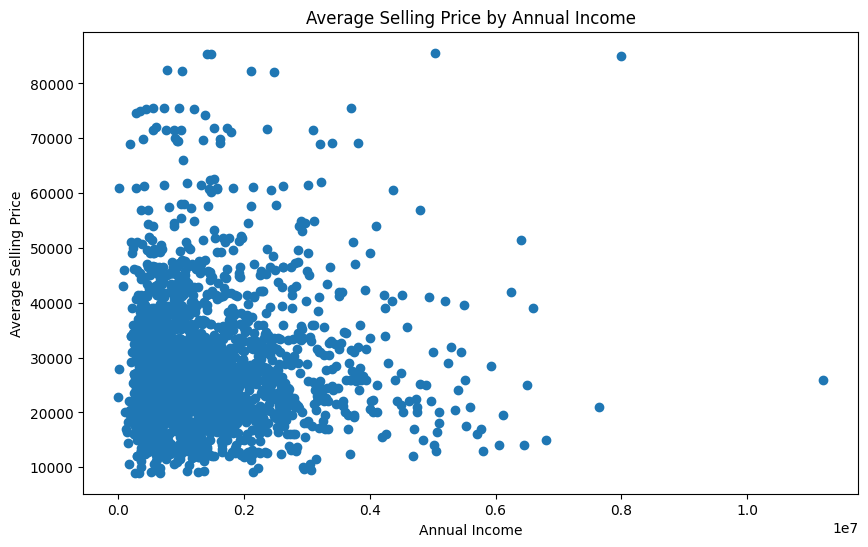

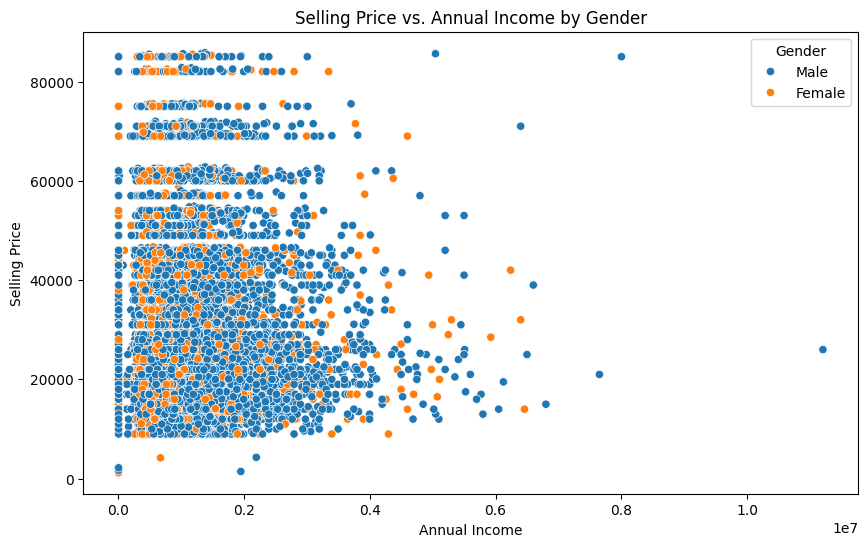

In [ ]:
average_price_by_gender = df2.groupby('Gender')['Price ($)'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=average_price_by_gender.index, y=average_price_by_gender.values)
plt.title('Average Selling Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Selling Price')
plt.show()


average_price_by_income = df2.groupby('Annual Income')['Price ($)'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(average_price_by_income.index, average_price_by_income.values)
plt.title('Average Selling Price by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Gender', data=df2)
plt.title('Selling Price vs. Annual Income by Gender')
plt.xlabel('Annual Income')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [ ]:
df2.groupby('Dealer_Region')['Price ($)'].mean()

Dealer_Region
Aurora        28334.626837
Austin        28341.603628
Greenville    28180.819054
Janesville    27833.350955
Middletown    27856.338875
Pasco         28119.039923
Scottsdale    27954.958928
Name: Price ($), dtype: float64

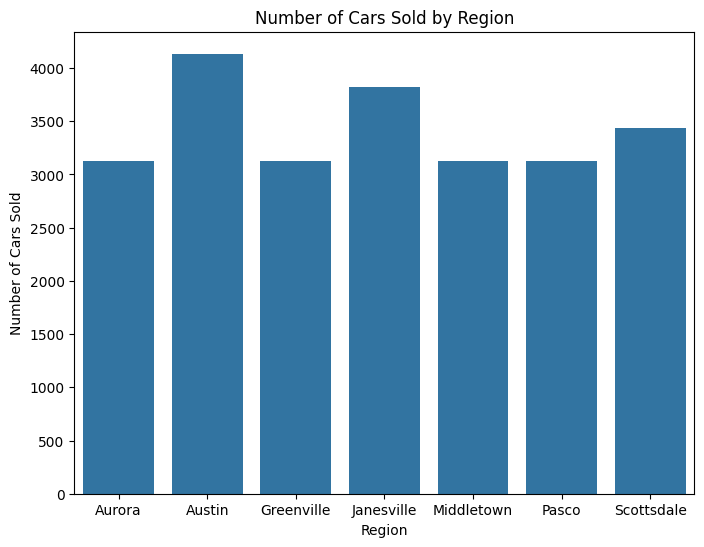

Dealer_Region
Aurora        3130
Austin        4135
Greenville    3128
Janesville    3821
Middletown    3128
Pasco         3131
Scottsdale    3433
Name: Car_id, dtype: int64

In [ ]:
cars_by_region = df2.groupby('Dealer_Region')['Car_id'].count()

plt.figure(figsize=(8, 6))
sns.barplot(x=cars_by_region.index, y=cars_by_region.values)
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.show()

cars_by_region

In [ ]:
#8. How does the average car price differ between cars with different engine sizes?

In [ ]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


Text(0, 0.5, 'Average Price')

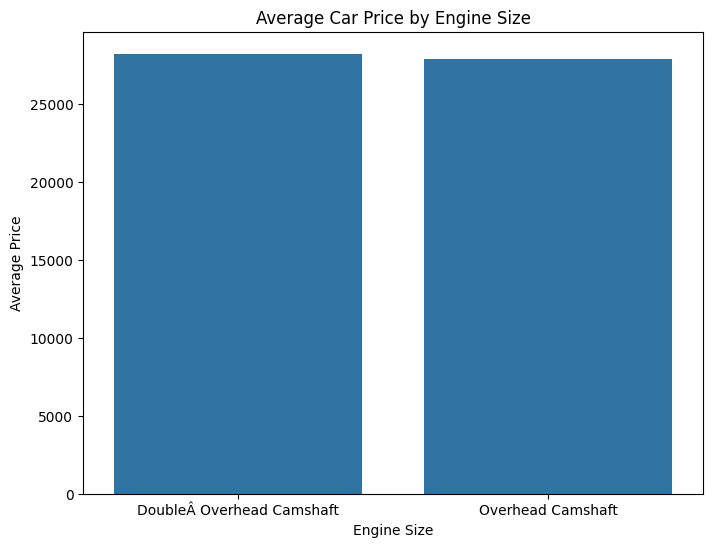

In [ ]:
avg_price_engine = df2.groupby('Engine')['Price ($)'].mean()
print(avg_price_engine)

plt.figure(figsize = (8,6))
sns.barplot(x = avg_price_engine.index, y = avg_price_engine.values)
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price')

In [ ]:
#9. How do car prices vary based on the customer’s annual income bracket?

In [ ]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

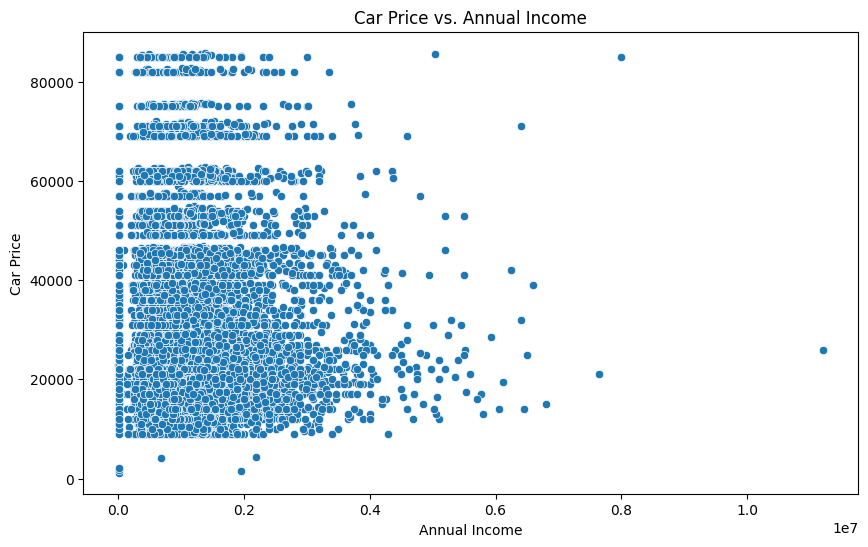

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=df2)
plt.title('Car Price vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Car Price')
plt.show()

In [ ]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [ ]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df2.groupby('Model')['Car_id'].count().sort_values(ascending = False).head()

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: Car_id, dtype: int64

In [ ]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

In [ ]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

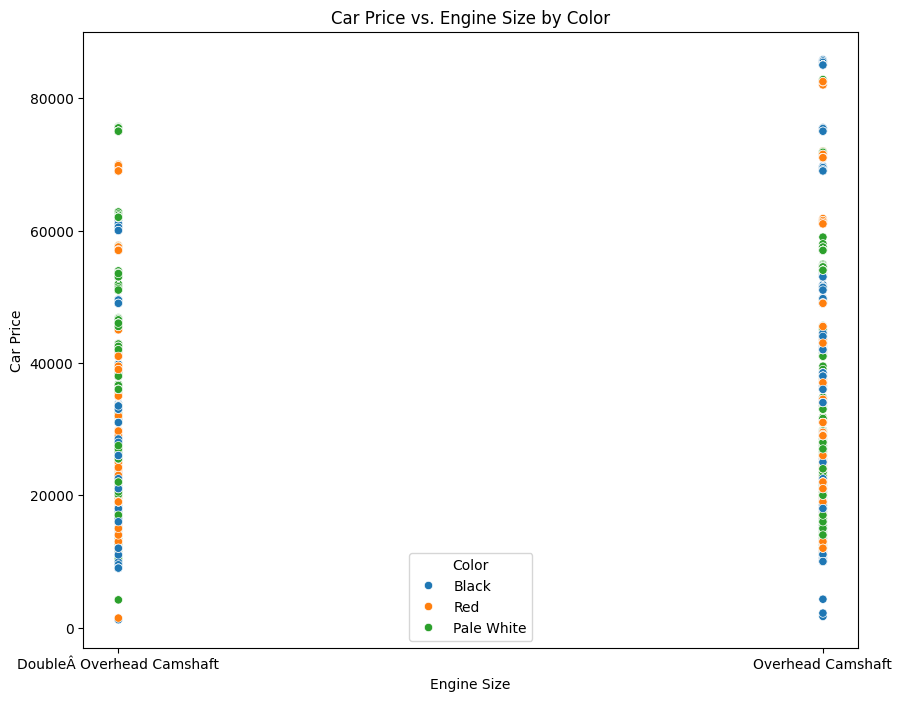

<bound method Series.nlargest of Color
Black         15286.065976
Pale White    14077.346859
Red           15519.360962
Name: Price ($), dtype: float64>


In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Engine', y = 'Price ($)', hue = 'Color', data = df2)
plt.title('Car Price vs. Engine Size by Color')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.show()

price_variation_by_color = df2.groupby('Color')['Price ($)'].std()
colors_with_highest_variation = price_variation_by_color.nlargest
print(colors_with_highest_variation)

In [ ]:
#12. Is there any seasonal trend in car sales based on the date of sale?

In [ ]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

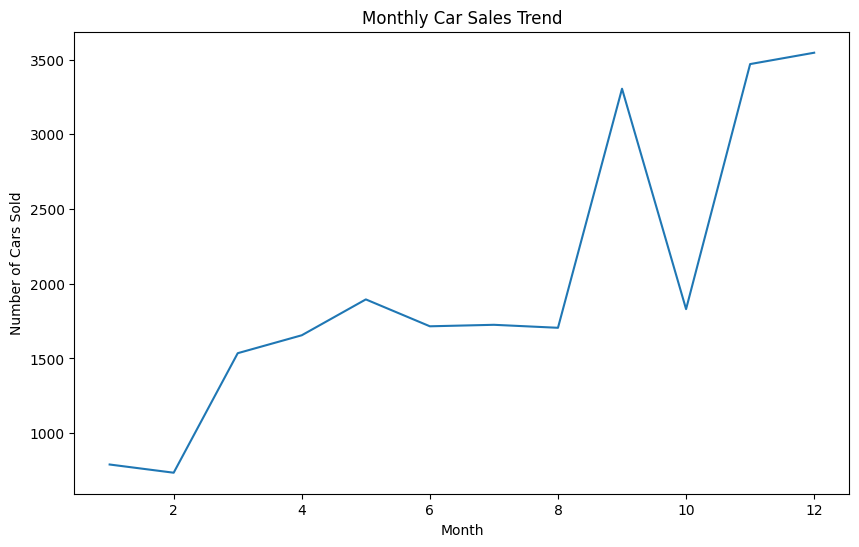

In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])

# Group by month and count car sales
monthly_sales = df2.groupby(df2['Date'].dt.month)['Car_id'].count()

# Plotting monthly sales
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.show()

In [ ]:
# it shows upper trend throughout the year
# there is max sale at december end
# from august sales started to increase
# from september, sales started to decrease and stops at being normal
# in october, again it started to increase sales

In [ ]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?

In [ ]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

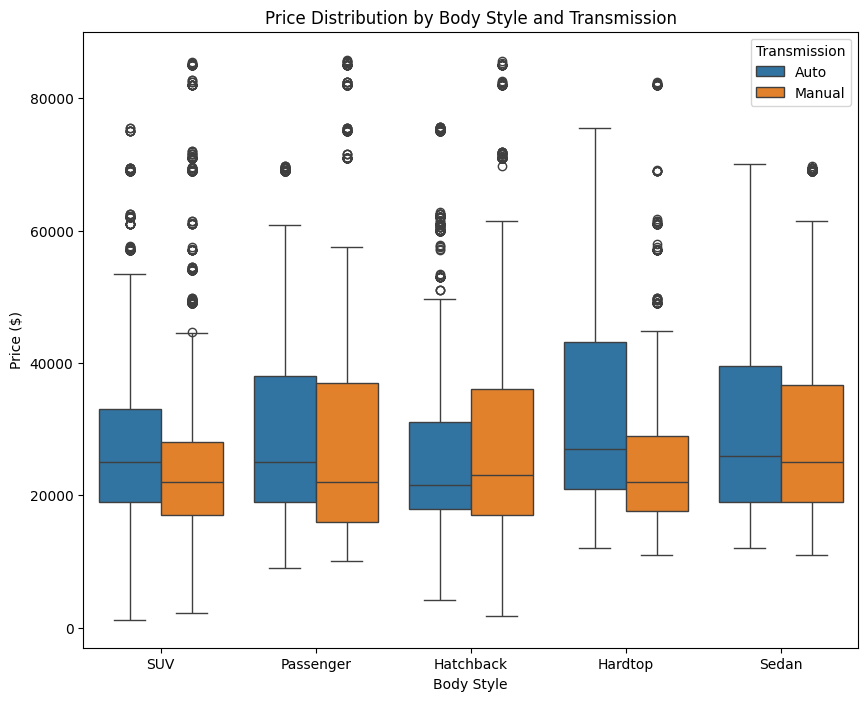

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Body Style', y = 'Price ($)', hue = 'Transmission', data = df2)
plt.title('Price Distribution by Body Style and Transmission')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.show()

In [ ]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
df2_dum = df2.copy()
df2_dum['Engine'] = encoder.fit_transform(df2_dum[['Engine']])

corr_met = df2_dum[['Price ($)', 'Engine', 'Annual Income']].corr()
corr_met

Price ($)    Engine  Annual Income
Price ($)       1.000000  0.011271       0.012065
Engine          0.011271  1.000000       0.006598
Annual Income   0.012065  0.006598       1.000000

In [ ]:
#15. How does the average car price vary across different car models and engine types?

In [ ]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

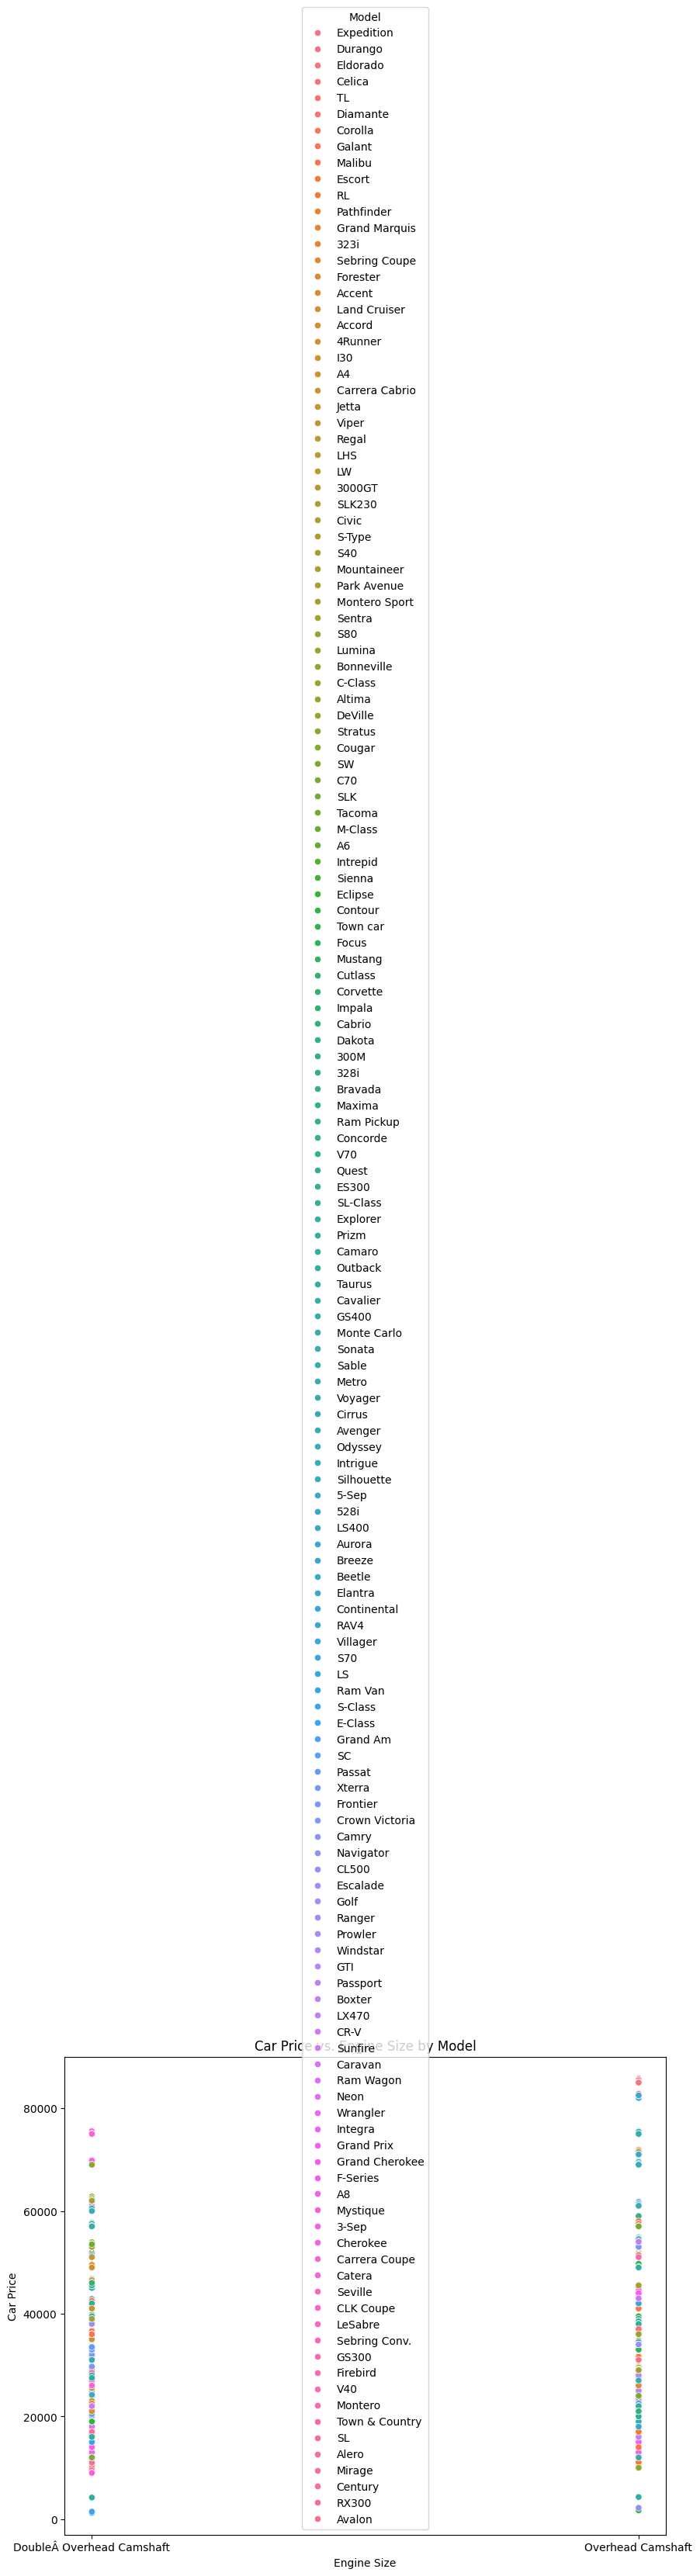

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Engine', y = 'Price ($)', hue = 'Model', data = df2)
plt.title('Car Price vs. Engine Size by Model')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.show()

In [ ]:
df2.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

Model                     Engine     Price ($)
0       3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1      3000GT  DoubleÂ Overhead Camshaft  22764.326923
2      3000GT          Overhead Camshaft  21770.659864
3        300M  DoubleÂ Overhead Camshaft  21394.888889
4        323i  DoubleÂ Overhead Camshaft  16744.632287
..        ...                        ...           ...
256  Windstar          Overhead Camshaft  17100.272727
257  Wrangler  DoubleÂ Overhead Camshaft  21145.294737
258  Wrangler          Overhead Camshaft  18742.942029
259    Xterra  DoubleÂ Overhead Camshaft  15940.459459
260    Xterra          Overhead Camshaft  31072.500000

[261 rows x 3 columns]

# **EDA-3**

**Description:**

This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

**Features:**

product_id: Unique identifier for each product

product_name: Name of the product

category: Category of the product

discounted_price: Discounted price of the product

actual_price: Actual price of the product

discount_percentage: Percentage of discount for the product

rating: Rating of the product (1-5)

rating_count: Number of people who voted for the Amazon rating

about_product: Description about the product

user_id: ID of the user who wrote the review

user_name: Name of the user who wrote the review

review_id: ID of the user review

review_title: Short review

review_content: Long review

img_link: Image link of the product

product_link: Official website link of the product

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df3 = pd.read_csv('amazon.csv')
df3

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹399   
1     Computers&Accessories|Accessories&Peripherals|...             ₹199   
2     Computers&Accessories|Accessories&Peripherals|...             ₹199   
3     Computers&Accessories|Accessories&Peripherals|...             ₹329   
4     Computers&Accessories|Accessories&Peripherals|...             ₹154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
0          ₹1,099                 64%    4.2       24,269   
1            ₹349                 43%    4.0       43,994   
2          ₹1,899                 90%    3.9        7,928   
3            ₹699                 53%    4.2       94,363   
4            ₹399                 61%    4.2       16,905   
...           ...                 ...    ...          ...   
1460         ₹919                 59%      4        1,090   
1461       ₹3,045                 25%    4.1        4,118   
1462       ₹3,080                 28%    3.6          468   
1463       ₹1,890                 26%      4        8,031   
1464       ₹3,690                 22%    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
df3.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [ ]:
df3.shape

(1465, 16)

In [ ]:
df3.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
df3.describe(include = object)

product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999                 50%    4.1        9,378   
freq            120                  56    244            9   

                                            about_product  \
count                                                1465   
unique                                               1293   
top     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
freq                                                    6   

                                                  user_id  \
count                                                1465   
unique                                               1194   
top     AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   
freq                                                   10   

                                                user_name  \
count                                                1465   
unique                                               1194   
top     $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...   
freq                                                   10   

                                                review_id  \
count                                                1465   
unique                                               1194   
top     R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...   
freq                                                   10   

                                             review_title  \
count                                                1465   
unique                                               1194   
top     Worked on iPhone 7 and didn’t work on XR,Good ...   
freq                                                   10   

                                           review_content  \
count                                                1465   
unique                                               1212   
top     I am not big on camera usage, personally. I wa...   
freq                                                    8   

                                                 img_link  \
count                                                1465   
unique                                               1412   
top     https://m.media-amazon.com/images/I/413sCRKobN...   
freq                                                    3   

                                             product_link  
count                                                1465  
unique                                               1465  
top     https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
freq                                                    1

In [ ]:
#1. What is the average rating for each product category?

In [ ]:
df3.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')
df3.groupby('category')['rating'].mean()

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens     4.150000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens    4.300000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|StickBallpointPens          4.133333
Toys&Games|Arts&Crafts|Drawing&PaintingSupplies|ColouringPens&Markers                                                     4.300000
Name: rating, Length: 211, dtype: float64

In [ ]:
#2.What are the top rating_count products by category?

In [ ]:
df3['rating_count'] = df3['rating_count'].str.replace(',', '').astype(float)

In [ ]:
df3.groupby(['category', 'product_name'])['rating_count'].max()

category                                                                                                                product_name                                                                                                                                                                                               
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                  Reffair AX30 [MAX] Portable Air Purifier for Car, Home & Office | Smart Ionizer Function | H13 Grade True HEPA Filter [Internationally Tested] Aromabuds Fragrance Option - Black                               1118.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                 Kanget [2 Pack] Type C Female to USB A Male Charger | Charging Cable Adapter Converter compatible for iPhone 14, 13, 12,11 Pro Max/Mini/XR/XS/X/SE, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad (Grey)     1540.0
                                                                                                                        rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver                4426.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                         Hp Wired On Ear Headphones With Mic With 3.5 Mm Drivers, In-Built Noise Cancelling, Foldable And Adjustable For Laptop/Pc/Office/Home/ 1 Year Warranty (B4B09Pa)                                                7222.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                      HUMBLE Dynamic Lapel Collar Mic Voice Recording Filter Microphone for Singing Youtube SmartPhones, Black                                                                                                        2804.0
                                                                                                                                                                                                                                                                                                                                        ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens  Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + 1 Black)                                                                                                                                                          2450.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|StickBallpointPens        Parker Vector Camouflage Gift Set - Roller Ball Pen & Parker Logo Keychain (Black Body, Blue Ink), 2 Piece Set                                                                                                  2493.0
                                                                                                                        Parker Vector Standard Chrome Trim Ball Pen (Ink - Black)                                                                                                                                                       3686.0
                                                                                                                        Pentonic Multicolor Ball Point Pen, Pack of 10                                                                                                                                                                  4308.0
Toys&Games|Arts&Crafts|Drawing&PaintingSupplies|ColouringPens&Markers                                                   Faber-Castell Connector Pen Set - Pack of 25 (Assorted)                                                                                                                                                       

In [ ]:
#3. What is the distribution of discounted prices vs. actual prices?

In [ ]:
df3.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
df3['discounted_price'] = df3['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df3['actual_price'] = df3['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

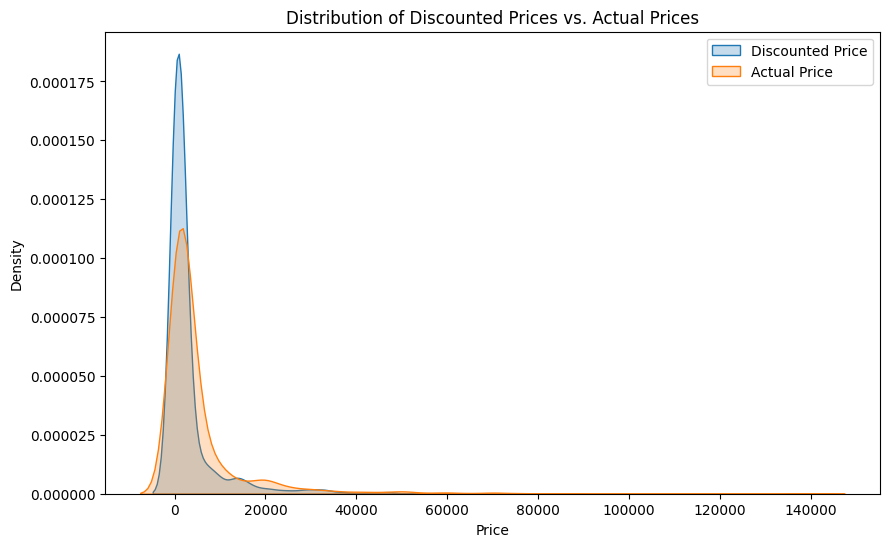

       discounted_price   actual_price
count       1465.000000    1465.000000
mean        3125.310874    5444.990635
std         6944.304394   10874.826864
min           39.000000      39.000000
25%          325.000000     800.000000
50%          799.000000    1650.000000
75%         1999.000000    4295.000000
max        77990.000000  139900.000000

Correlation between discounted and actual price: 0.9619152799880138


In [ ]:
plt.figure(figsize = (10,6))
sns.kdeplot(df3['discounted_price'], label='Discounted Price', fill=True)
sns.kdeplot(df3['actual_price'], label='Actual Price', fill=True)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate and print descriptive statistics
print(df3[['discounted_price', 'actual_price']].describe())

# Calculate and print the correlation between discounted and actual prices
correlation = df3['discounted_price'].corr(df3['actual_price'])
print(f"\nCorrelation between discounted and actual price: {correlation}")

In [ ]:
#4.How does the average discount percentage vary across categories?

In [ ]:
df3.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
df3['discount_percentage'] = df3['discount_percentage'].str.replace('%', '').astype(float)

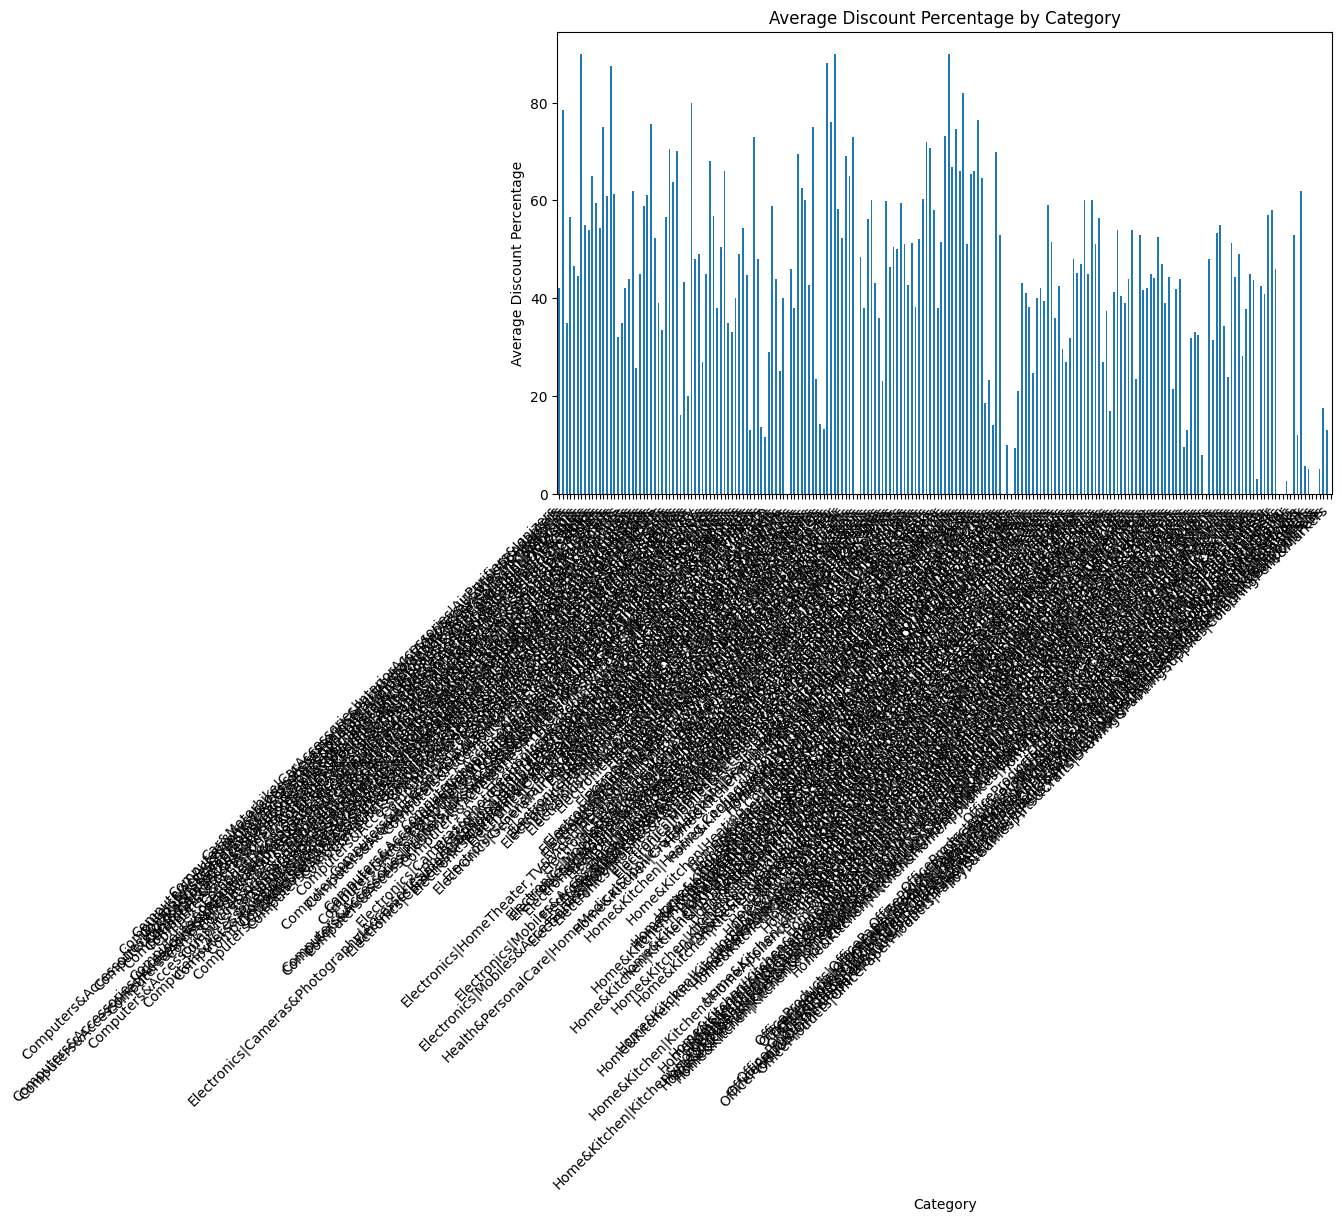

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens      5.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens    17.5
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|StickBallpointPens          13.0
Toys&Games|Arts&Crafts|Drawing&PaintingSupplies|ColouringPens&Markers                                                      0.0
Name: discount_percentage, Length: 211, dtype: float64

In [ ]:
plt.figure(figsize=(10, 6))
df3.groupby('category')['discount_percentage'].mean().plot(kind='bar')
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#statistical approach
df3.groupby('category')['discount_percentage'].mean()

In [ ]:
#5.What are the most popular product names?

In [ ]:
df3.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
#to have most popular products, we look for rating
df3.groupby('product_name')['rating'].mean().sort_values(ascending = False).head(10)

product_name
Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop                                                                                                              5.0
Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)                                                                                                 5.0
REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White                                                                                   5.0
Instant Pot Air Fryer, Vortex 2QT, Touch Control Panel, 360° EvenCrisp™ Technology, Uses 95 % less Oil, 4-in-1 Appliance: Air Fry, Roast, Bake, Reheat (Vortex 1.97Litre, Black)                                                                                                4.8
Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))                                                                                            4.8
Oratech Coffee Frother electric, milk frother electric, coffee beater, cappuccino maker, Coffee Foamer, Mocktail Mixer, Coffee Foam Maker, coffee whisker electric, Froth Maker, coffee stirrers electric, coffee frothers, Coffee Blender, (6 Month Warranty) (Multicolour)    4.8
Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black)                                                                                                                                                                                                4.7
FIGMENT Handheld Milk Frother Rechargeable, 3-Speed Electric Frother for Coffee with 2 Whisks and Coffee Decoration Tool, Coffee Frother Mixer, CRESCENT ENTERPRISES VRW0.50BK (A1)                                                                                             4.7
Zuvexa USB Rechargeable Electric Foam Maker - Handheld Milk Wand Mixer Frother for Hot Milk, Hand Blender Coffee, Egg Beater (Black)                                                                                                                                            4.7
Campfire Spring Chef Prolix Instant Portable Water Heater Geyser 1Ltr. for Use Home Stainless Steel Baking Rack | Restaurant | Office | Labs | Clinics | Saloon | with Installation Kit (With MCB)                                                                              4.7
Name: rating, dtype: float64

In [ ]:
#6.What are the most popular product keywords?

In [ ]:
# Create a new column 'keywords' by extracting words from 'product_name'
df3['keywords'] = df3['product_name'].str.lower().str.split()

# Explode the 'keywords' column to have each keyword on a separate row
keywords_df = df3.explode('keywords')

# Group by 'keywords' and count the occurrences
keyword_counts = keywords_df.groupby('keywords')['keywords'].count().sort_values(ascending=False)

# Display the most popular product keywords (e.g., top 10)
print(keyword_counts.head(10))

keywords
with        751
for         672
|           457
&           432
usb         377
and         330
cable       320
-           220
charging    219
to          218
Name: keywords, dtype: int64


In [ ]:
#7. What are the most popular product reviews?

In [ ]:
df3.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'keywords'],
      dtype='object')

In [ ]:
# Assuming "popularity" is based on the rating_count.
popular_reviews = df3.sort_values('rating_count', ascending=False)
popular_reviews[['product_name', 'review_title', 'review_content', 'rating_count']].head(10)

product_name  \
12   AmazonBasics Flexible Premium HDMI Cable (Blac...   
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
684  AmazonBasics Flexible Premium HDMI Cable (Blac...   
400  boAt Bassheads 100 in Ear Wired Earphones with...   
352  boAt Bassheads 100 in Ear Wired Earphones with...   
584  boAt BassHeads 100 in-Ear Wired Headphones wit...   
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...   
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...   
473  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...   

                                          review_title  \
12   It's quite good and value for money,Works well...   
65   It's quite good and value for money,Works well...   
47   It's quite good and value for money,Works well...   
684  It's quite good and value for money,Works well...   
400  Best value for money,HEAD PHONE POUCH NOT RECE...   
352  Best value for money,HEAD PHONE POUCH NOT RECE...   
584  Best value for money,HEAD PHONE POUCH NOT RECE...   
370  Best phone for below normal use,Good mobile fo...   
371  Best phone for below normal use,Good mobile fo...   
473  Best phone for below normal use,Good mobile fo...   

                                        review_content  rating_count  
12   I am using it for 14 days now. The experience ...      426973.0  
65   I am using it for 14 days now. The experience ...      426973.0  
47   I am using it for 14 days now. The experience ...      426973.0  
684  I am using it for 14 days now. The experience ...      426972.0  
400  The sound quality of this earphone are really ...      363713.0  
352  The sound quality of this earphone are really ...      363713.0  
584  The sound quality of this earphone are really ...      363711.0  
370  If you want a smart phone for just the use of ...      313836.0  
371  If you want a smart phone for just the use of ...      313836.0  
473  If you want a smart phone for just the use of ...      313832.0

In [ ]:
#8. What is the correlation between discounted_price and rating?

In [ ]:
correlation = df3['discounted_price'].corr(df3['rating'])
print(correlation)


0.12033741712288548


In [ ]:
#9. What are the Top 5 categories based on the highest ratings?

In [ ]:
top_5_categories = df3.groupby('category')['rating'].mean().nlargest(5)
top_5_categories

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64

In [ ]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.

In [ ]:
# Here are some of the improvments can be done
#1. by making some of the columns numeric datatypes like rating, price type of columns
#2. Can look for outliers and remove the outliers by IQR technique
#3. Handling null values more robustly
#4. Performing feature engineering like taking those columns which is necessary for calculation and drop unnecessary columns

# **EDA-4**

**Description of the Dataset:**

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.

**Application in Data Science:**

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

**Column Descriptors:**

Artist: The name of the artist, providing direct attribution to the creative mind behind the track.

Track Name: The title of the track, encapsulating its identity and essence.

Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.

Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.

Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df4 = pd.read_csv('spotify.csv')
df4

Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
435  French Montana                                    Splash Brothers   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   
439       Rick Ross                                       Stay Schemin   

     Popularity  Duration (ms)                Track ID  
0            92         319191  1yeB8MUNeLo9Ek1UEpsyz6  
1            91         173986  1zi7xx7UVEFkmKfv06H8x0  
2            90         260111  2YSzYUF3jWqb9YP9VXmpjE  
3            88         247444  7aqfrAY2p9BUSiupwk3svU  
4            88         218364  3F5CgOj3wFlRv51JsHbxhe  
..          ...            ...                     ...  
435          44         221863  3fBsEOnzwtlkpS0LxXAZhN  
436          64         191900  7Ezwtgfw7khBrpvaNPtMoT  
437          69         283693  7xVLFuuYdAvcTfcP3IG3dS  
438          65         220408  4hGmQboiou09EwhcTWa0H6  
439          68         267720  0nq6sfr8z1R5KJ4XUk396e  

[440 rows x 5 columns]

In [3]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [4]:
df4.dtypes

Artist           object
Track Name       object
Popularity        int64
Duration (ms)     int64
Track ID         object
dtype: object

In [5]:
df4.isna().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [6]:
df4.shape

(440, 5)

In [7]:
df4.describe()

Popularity  Duration (ms)
count  440.000000     440.000000
mean    75.736364  206810.040909
std      9.886534   53576.930289
min     29.000000   81666.000000
25%     70.000000  172778.500000
50%     77.000000  201866.000000
75%     83.000000  235119.750000
max     97.000000  501648.000000

In [8]:
df4.describe(include = object)

Artist                                         Track Name  \
count     440                                                440   
unique    115                                                412   
top     Drake  Annihilate (Spider-Man: Across the Spider-Vers...   
freq       20                                                  3   

                      Track ID  
count                      440  
unique                     413  
top     39MK3d3fonIP8Mz9oHCTBB  
freq                         3

In [9]:
df4.head()

Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe

In [10]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [11]:
df4.isna().sum() #no null value in this dataframe.

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [12]:
duplicate_rows = df4[df4.duplicated()]
print("\nDuplicate rows:\n", duplicate_rows)
df4 = df4.drop_duplicates()


Duplicate rows:
               Artist                                         Track Name  \
39      Travis Scott                             MELTDOWN (feat. Drake)   
52      Travis Scott                   TELEKINESIS (feat. SZA & Future)   
72         21 Savage                                            née-nah   
73             Drake                      Jimmy Cooks (feat. 21 Savage)   
76             Drake                                          Rich Flex   
131            Drake               First Person Shooter (feat. J. Cole)   
170     Metro Boomin            Trance (with Travis Scott & Young Thug)   
182   D-Block Europe                                           Overseas   
210      Post Malone      Sunflower - Spider-Man: Into the Spider-Verse   
212     Metro Boomin  Annihilate (Spider-Man: Across the Spider-Vers...   
222          Cardi B                    WAP (feat. Megan Thee Stallion)   
224          Cardi B                 Bongos (feat. Megan Thee Stallion)   
242    

In [13]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

In [14]:
df4.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

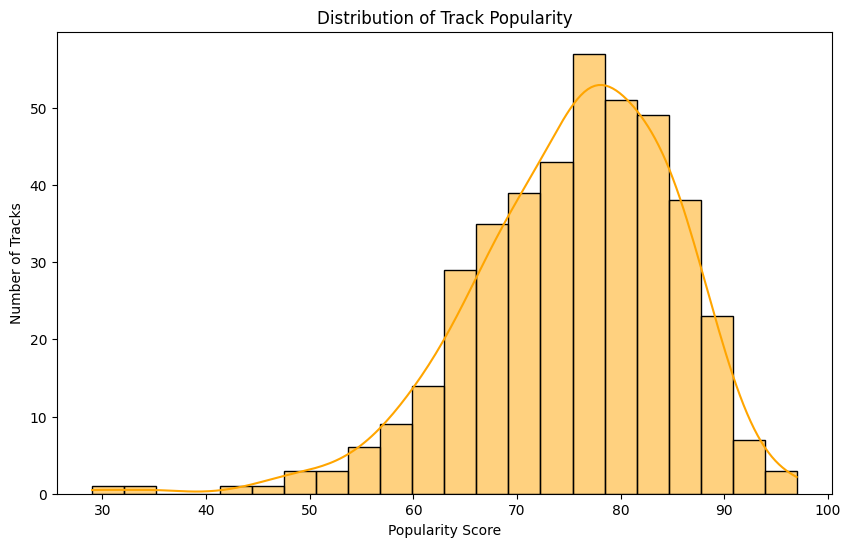

In [15]:
# Assuming 'Popularity' is the column representing track popularity.
plt.figure(figsize=(10, 6))
sns.histplot(df4['Popularity'], kde=True, color = 'orange')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.show()

In [16]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

In [17]:
df4.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

Text(0.5, 0, 'Popularity Score')

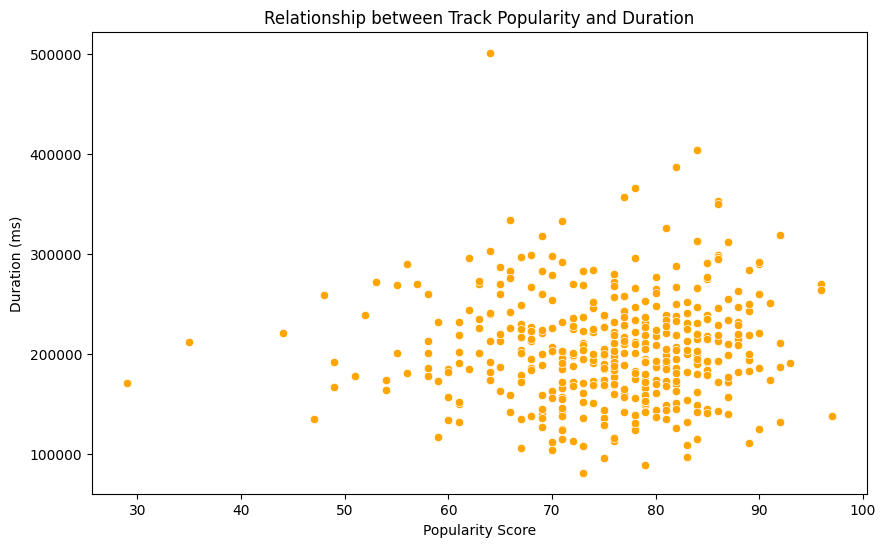

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Popularity', y='Duration (ms)', data=df4, color = 'orange')
plt.title('Relationship between Track Popularity and Duration')
plt.xlabel('Popularity Score')

In [19]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

In [20]:
df4.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [21]:
ar_tr = df4.groupby('Artist')['Track Name'].count().sort_values(ascending = False)
ar_tr

Artist
Drake               17
Eminem              11
¥$                  10
21 Savage           10
Timbaland           10
                    ..
Lyrical Lemonade     1
Maroon 5             1
NEIKED               1
Nardo Wick           1
*NSYNC               1
Name: Track Name, Length: 115, dtype: int64

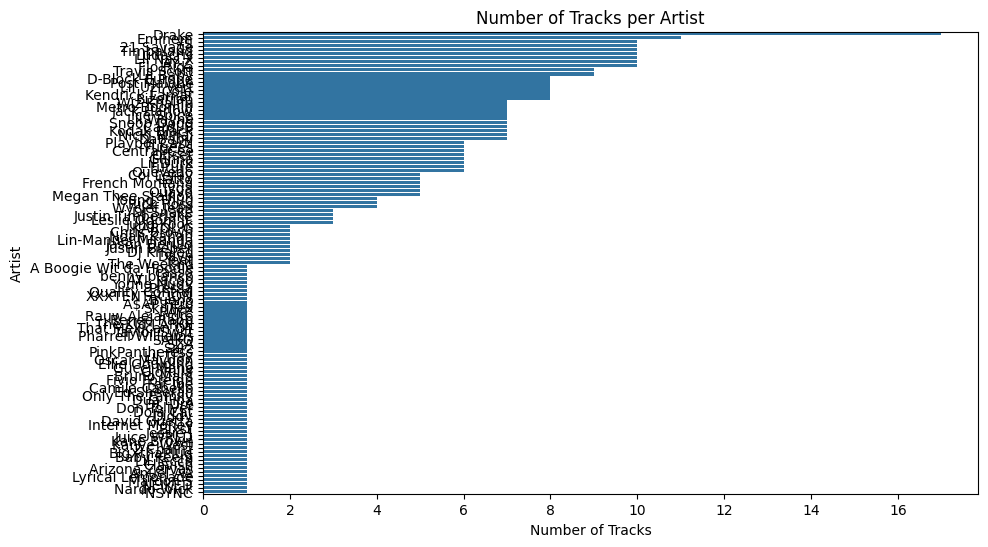

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Artist', data=df4, order=df4.groupby('Artist')['Track Name'].count().sort_values(ascending=False).index)
plt.title('Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

In [23]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [24]:
df4.sort_values(by='Popularity', ascending=True)[['Artist', 'Track Name']].head()

Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)

In [25]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [26]:
df4.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [27]:
top_ar = df4.sort_values(by='Popularity', ascending=False)[['Artist', 'Popularity']].head()
top_ar[top_ar['Popularity'] == top_ar['Popularity'].max()]

Artist  Popularity
40  Jack Harlow          97

In [28]:
df4.groupby('Artist')['Popularity'].mean()

Artist
*NSYNC                    67.00
2 Chainz                  72.00
21 Savage                 83.80
A Boogie Wit da Hoodie    80.00
A$AP Ferg                 69.00
                          ...  
Young Nudy                67.00
Young Thug                73.75
benny blanco              72.00
cassö                     92.00
¥$                        85.10
Name: Popularity, Length: 115, dtype: float64

In [29]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [30]:
df4.sort_values(by='Popularity', ascending=False)[['Track Name', 'Artist']].head()

Track Name        Artist
40                  Lovin On Me   Jack Harlow
70                       redrum     21 Savage
260                    CARNIVAL            ¥$
30   FE!N (feat. Playboi Carti)  Travis Scott
140                       Prada         cassö

In [31]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

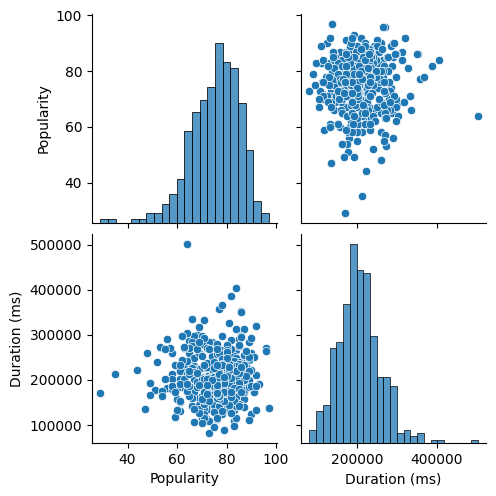

In [32]:
df4_num = df4.select_dtypes(include=[np.number])
sns.pairplot(df4_num)
plt.show()

In [33]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

In [34]:
df4.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

Text(0, 0.5, 'Duration (ms)')

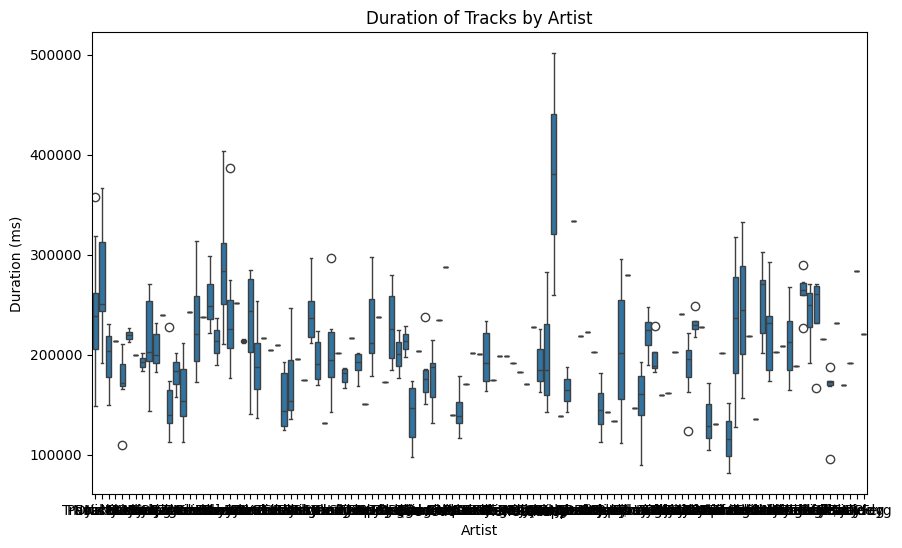

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df4)
plt.title('Duration of Tracks by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')

In [ ]:
#duration are not varying every time it shows a constant level but for one - two artist it varies to more than 400000 ms.

In [35]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

In [37]:
df4.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

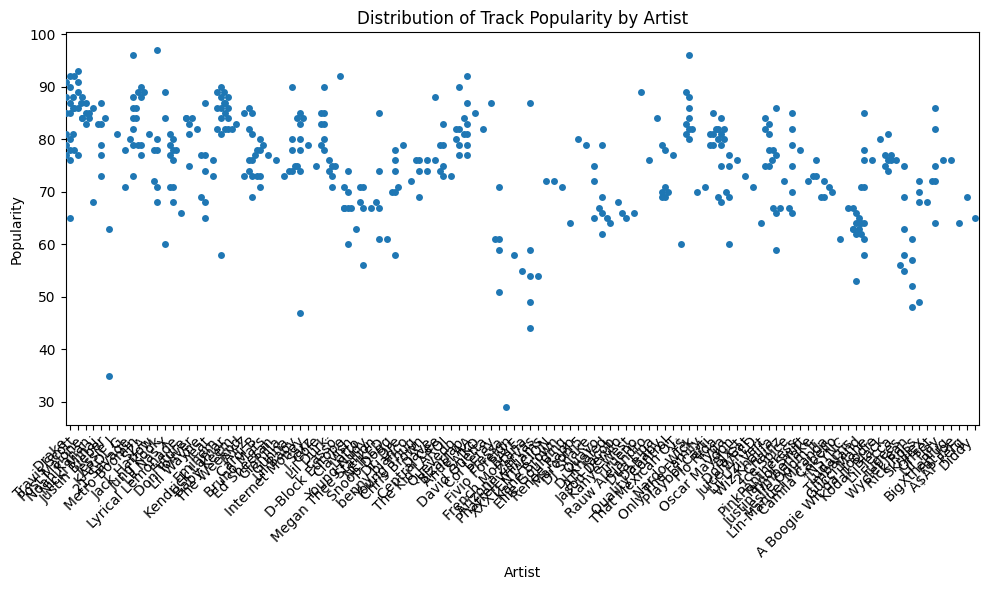

In [42]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Artist', y='Popularity', data=df4)
plt.title('Distribution of Track Popularity by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# track popularity is constant for artists but few outliers present.